# 🛒 Retail Analysis Project
This project includes Sales Trend Analysis using SQL & Python and Market Basket Analysis using Python.

## 📊 Sales Trend Analysis - Load & Explore Data

In [3]:
import pandas as pd

# Load the retail sales data
sales_df = pd.read_csv(r"C:\Users\DELL\Downloads\sales data-set.csv")  # Replace with actual path
sales_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


## 🧮 SQL Analysis using SQLite

In [4]:
import sqlite3

# Load data into SQLite
conn = sqlite3.connect(':memory:')
sales_df.to_sql('sales', conn, index=False)

# Query: Total sales by store
query = '''
SELECT Store, SUM(Weekly_Sales) as Total_Sales
FROM sales
GROUP BY Store
ORDER BY Total_Sales DESC
'''
store_sales = pd.read_sql(query, conn)
store_sales.head()

,Store,Total_Sales
0,20,3.013978e+08
1,4,2.995440e+08
2,14,2.889999e+08
3,13,2.865177e+08
4,2,2.753824e+08


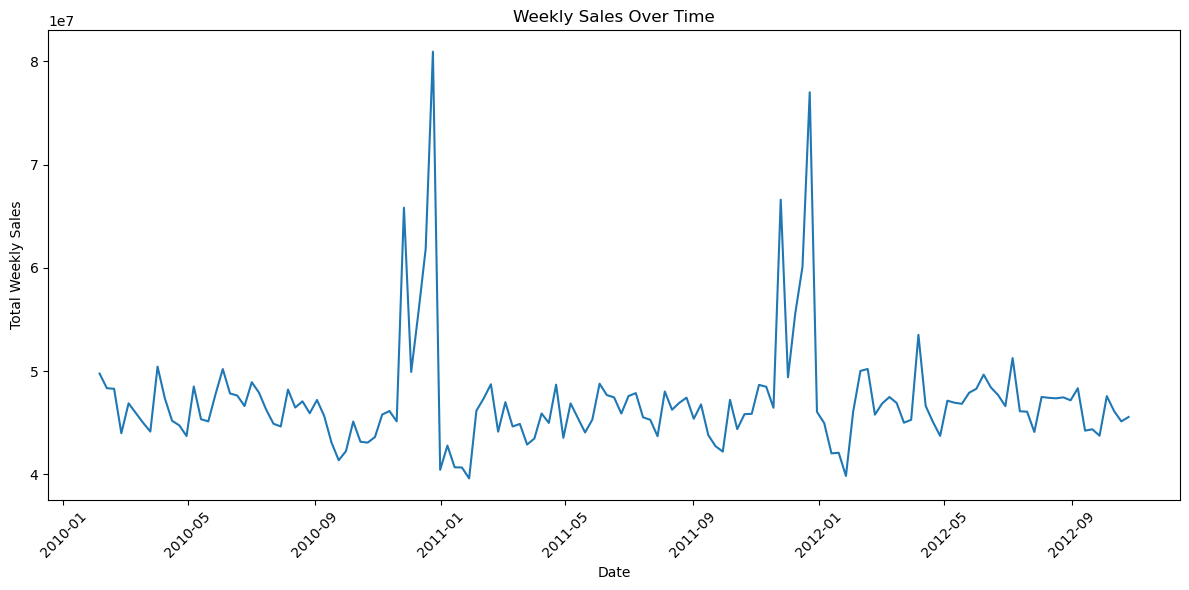

In [24]:
## 📈 Visualize Weekly Sales Trends

import matplotlib.pyplot as plt
import seaborn as sns


sales_df['Date'] = pd.to_datetime(sales_df['Date'], dayfirst=True)
sales_by_date = sales_df.groupby('Date')['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=sales_by_date, x='Date', y='Weekly_Sales')
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 🛍️ Market Basket Analysis

In [26]:
# Load groceries data
groceries_df = pd.read_csv(r"C:\Users\DELL\Downloads\Groceries_dataset.csv")  # Replace with actual path
groceries_df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [27]:
# Transform data to list of lists
transactions = groceries_df.groupby('Member_number')['itemDescription'].apply(list)

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
basket_df = pd.DataFrame(te_ary, columns=te.columns_)

# Frequent itemsets
frequent_itemsets = apriori(basket_df, min_support=0.01, use_colnames=True)

# Generate rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head()

,antecedents,consequents,support,confidence,lift
0,(beef),(UHT-milk),0.010518,0.087983,1.120775
1,(UHT-milk),(beef),0.010518,0.133987,1.120775
2,(bottled beer),(UHT-milk),0.014879,0.093700,1.193597
3,(UHT-milk),(bottled beer),0.014879,0.189542,1.193597
4,(bottled water),(UHT-milk),0.021293,0.099640,1.269268


# 🔁 Merged with Machine Learning Analysis

# 🛒 Retail Analysis Project with EDA and Machine Learning
This project includes Sales Trend Analysis, EDA, and Market Basket Analysis. We'll also use ML algorithms to predict sales.

## 📊 Load and Display Data

In [29]:
import pandas as pd

# Load the retail sales data
df = pd.read_csv(r"C:\Users\DELL\Downloads\sales data-set.csv")  # Replace with correct path
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


## 🧹 Exploratory Data Analysis (EDA)

In [30]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


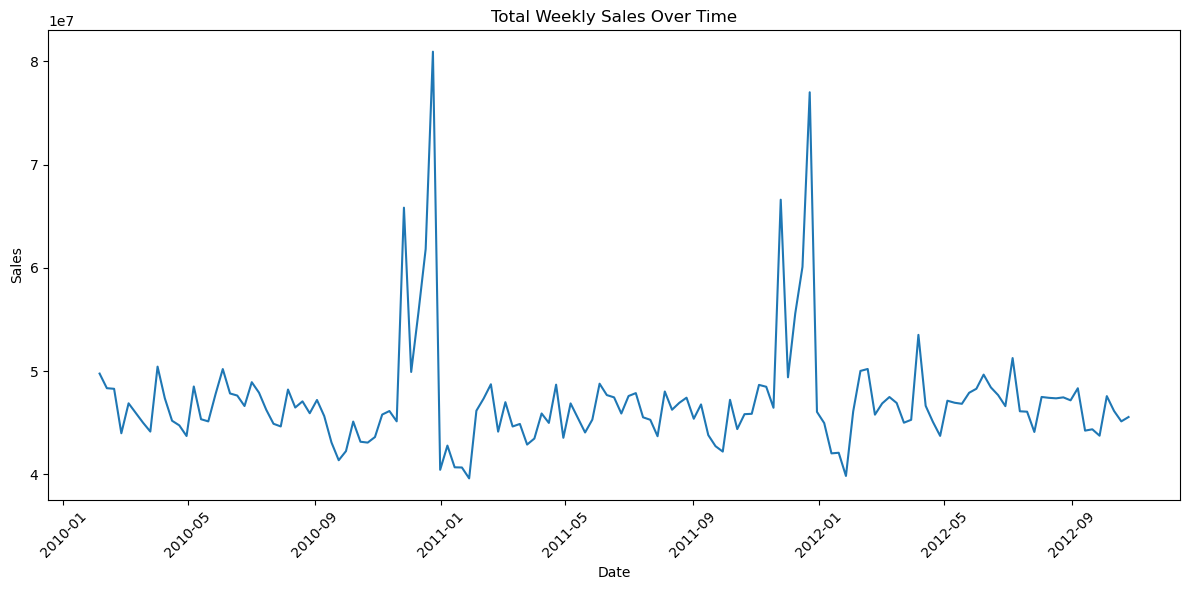

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df.groupby('Date')['Weekly_Sales'].sum().reset_index(), x='Date', y='Weekly_Sales')
plt.title('Total Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 🛠️ Data Preprocessing

In [32]:
df = df.dropna()
df = df[df['Weekly_Sales'] > 0]

# Feature engineering
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Year'] = df['Date'].dt.year

# Select features and target
X = df[['Store', 'Dept', 'Month', 'Day', 'Year']]
y = df['Weekly_Sales']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 🤖 Machine Learning Model - Random Forest Regressor

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

MAE: 1435.92
MSE: 17022532.34
RMSE: 4125.84
R²: 0.97


## 🧪 Hyperparameter Tuning - GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='r2',
                           cv=3,
                           n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Evaluate best model
best_pred = best_model.predict(X_test)
best_r2 = r2_score(y_test, best_pred)
print(f"Best R² after tuning: {best_r2:.2f}")

try:
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_pred = best_model.predict(X_test)
    best_r2 = r2_score(y_test, best_pred)
    print(f"Best R² after tuning: {best_r2:.2f}")
except Exception as e:
    print(f"Error: {e}")

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\joblib\_utils.py:37: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\joblib\_utils.py:37: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\joblib\_utils.py:38: DeprecationWarning: Attribute n is deprecated and will be removed in Python 3.14; use value instead
  return node.n
C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\joblib\_utils.py:37: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\joblib\_utils.py:38: DeprecationWarning: Attribute n i